## Boston Housing Dataset


Estos datos originalmente formaban parte del Repositorio de aprendizaje automático de UCI y ahora se han eliminado. Estos datos también se envían con la biblioteca scikit-learn.
Hay 506 muestras y 13 variables de características en este conjunto de datos. El objetivo es predecir el valor de los precios de la casa utilizando las características dadas.

La descripción de todas las varuables se da a continuación:

**CRIM**: Tasa de delincuencia per cápita por ciudad

**ZN**: Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados

**INDUS**: Proporción de acres comerciales no minoristas por ciudad

**CHAS**: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)

**NOX**: concentración de óxido nítrico (partes por 10 millones)

**RM**: Número medio de habitaciones por vivienda

**EDAD**: Proporción de unidades ocupadas por el propietario construidas antes de 1940

**DIS**: distancias ponderadas a cinco centros de empleo de Boston

**RAD**: Índice de accesibilidad a carreteras radiales

**IMPUESTO**: Tasa de impuesto a la propiedad de valor total por $ 10,000

**B**: 1000 (Bk - 0.63) ², donde Bk es la proporción de [personas de ascendencia afroamericana] por ciudad

**LSTAT**: Porcentaje de menor estatus de la población

**PRECIO**: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000
  
  



1. Realizad un estudio de la distribución de los datos.
2. Aplicad los métodos de Manifold Learning vistos en clase.
3. Aplicad SOM para visualizar los datos.
4. Aplicad los modelos que consideréis de clustering para generar agrupaciones de casas con características similares.
5. Representad los clusters en 3D mediante una transformación con PCA y con t-SNE.

## Importamos las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
import pandas as pd  
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.manifold import TSNE
import simpsom as sps

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

## Cargamos el dataset

In [2]:
boston_dataset = load_boston()

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
boston['PRECIO'] = boston_dataset.target

Preprocesado de datos

In [5]:
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRECIO  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [6]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRECIO     0
dtype: int64

/Users/franvaquer92/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


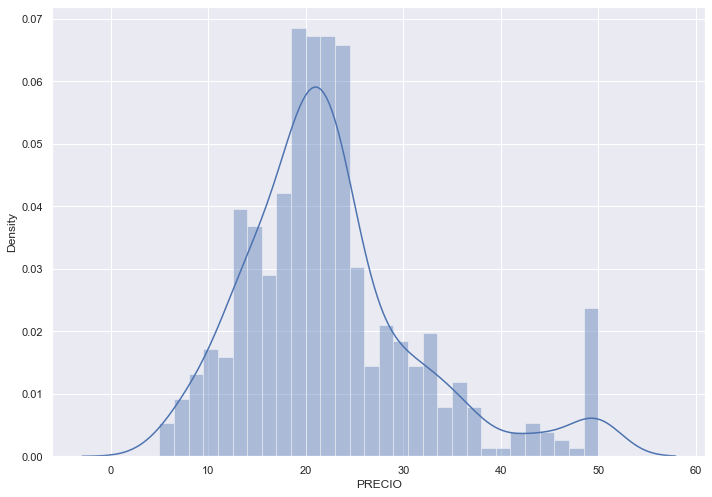

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(boston['PRECIO'], bins=30)
plt.show()

Vemos las correlaciones entre variables.

In [8]:
correlation_matrix = boston.corr().round(2)

<AxesSubplot:>

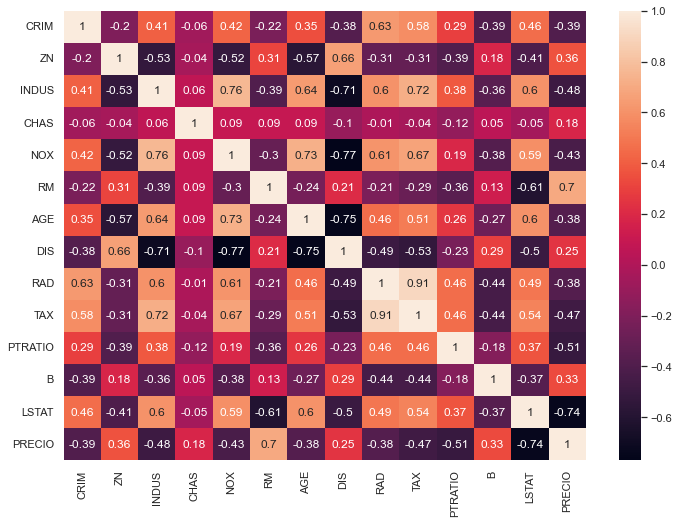

In [9]:
sns.heatmap(data=correlation_matrix, annot=True)

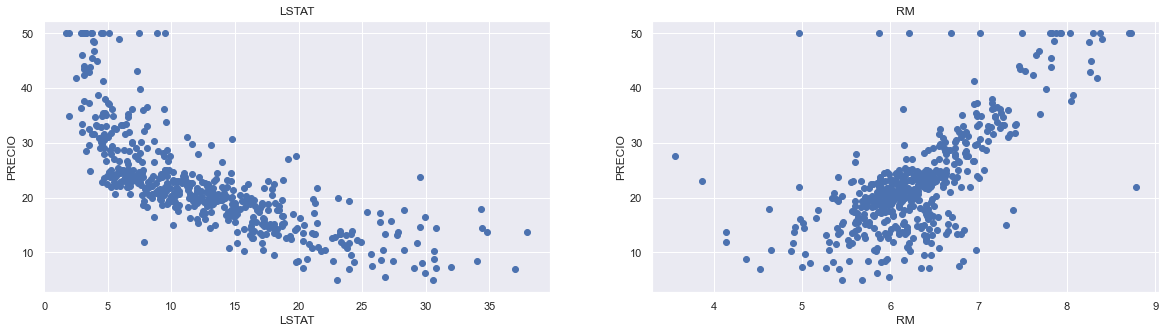

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['PRECIO']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRECIO')

## Aplicad los métodos de Manifold Learning vistos en clase.

In [11]:
boston["Rango_precio"] = np.where(boston["PRECIO"] <= 15, "ASEQUIBLE", np.where(boston["PRECIO"] > 25, "ALTO", "MEDIO"))

In [12]:
df_norm = boston.copy()

In [13]:
scaler = StandardScaler()

In [14]:
df_norm[boston_dataset.feature_names] = scaler.fit_transform(df_norm[boston_dataset.feature_names])

In [15]:
df_norm.head(10)

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
5 -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
6 -0.410243  0.048772 -0.476654 -0.272599 -0.265154 -0.388411 -0.070229   
7 -0.403696  0.048772 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
8 -0.395935  0.048772 -0.476654 -0.272599 -0.265154 -0.931206  1.117494   
9 -0.400729  0.048772 -0.476654 -0.272599 -0.265154 -0.399808  0.616090   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  PRECIO  \
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562    24.0   
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439    21.6   
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727    34.7   
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517    33.4   
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501    36.2   
5  1.077737 -0.752922 -1.106115  0.113032  0.410571 -1.043322    28.7   
6  0.839244 -0.523001 -0.577519 -1.505237  0.426798 -0.031268    22.9   
7  1.024638 -0.523001 -0.577519 -1.505237  0.441052  0.910700    27.1   
8  1.087196 -0.523001 -0.577519 -1.505237  0.328448  2.421774    16.5   
9  1.329635 -0.523001 -0.577519 -1.505237  0.329325  0.623344    18.9   

  Rango_precio  
0        MEDIO  
1        MEDIO  
2         ALTO  
3         ALTO  
4         ALTO  
5         ALTO  
6        MEDIO  
7         ALTO  
8        MEDIO  
9        MEDIO

Aplicamos PCA

In [16]:
pca = PCA(n_components = 3, random_state = 42)

In [17]:
pca_3 = pca.fit_transform(df_norm[boston_dataset.feature_names])

In [18]:
df_pca = pd.DataFrame({"pc1":pca_3[:,0], "pc2":pca_3[:,1], "pc3":pca_3[:,2], "PRECIO": df_norm["PRECIO"], "Rango_precio": df_norm["Rango_precio"]})

In [19]:
df_pca.head(10)

pc1       pc2       pc3  PRECIO Rango_precio
0 -2.098297  0.773113  0.342943    24.0        MEDIO
1 -1.457252  0.591985 -0.695199    21.6        MEDIO
2 -2.074598  0.599639  0.167122    34.7         ALTO
3 -2.611504 -0.006871 -0.100284    33.4         ALTO
4 -2.458185  0.097712 -0.075348    36.2         ALTO
5 -2.214852 -0.009487 -0.672381    28.7         ALTO
6 -1.358881  0.349872 -0.371999    22.9        MEDIO
7 -0.842045  0.577800 -0.518540    27.1         ALTO
8 -0.179928  0.342518 -1.349639    16.5        MEDIO
9 -1.074184  0.316201 -0.558469    18.9        MEDIO

Vamos a ver el ratio de la varianza explicada para cada una de las dos variables

In [20]:
pca.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 ])

In [21]:
pca.explained_variance_ratio_.sum()

0.6771338939748566

<BarContainer object of 3 artists>

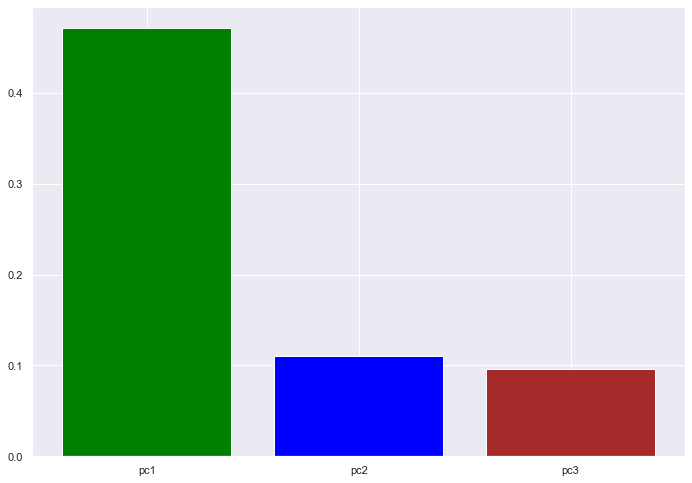

In [22]:
plt.bar(["pc1", "pc2", "pc3"], pca.explained_variance_ratio_, color = ["green", "blue", "brown"])

Vamos a visualizar los datos

/var/folders/jm/_cqzmbbs0jv4bdms06q4tfdh0000gn/T/ipykernel_19785/4192634207.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


Text(0.5, 0, '3er autovector pc2')

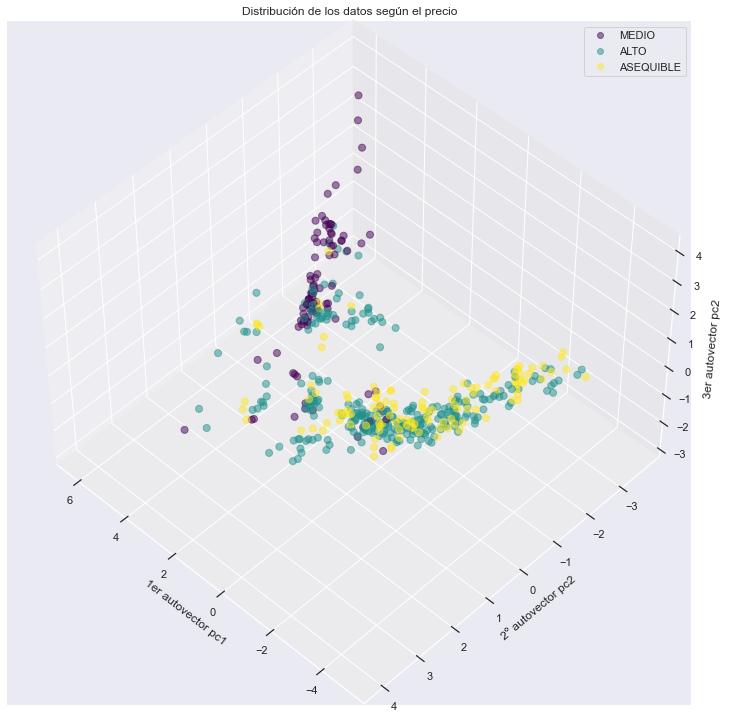

In [23]:
df_pca["colores"] = np.where(df_pca["Rango_precio"] == "ASEQUIBLE", 0, np.where(df_pca["Rango_precio"] == "MEDIO", 1, 2))   
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_pca["pc1"], df_pca["pc2"], df_pca["pc3"], marker = "o", s = 50, c = df_pca["colores"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_pca.Rango_precio.unique().tolist())
ax.set_title("Distribución de los datos según el precio")
ax.set_xlabel("1er autovector pc1")
ax.set_ylabel("2º autovector pc2")
ax.set_zlabel("3er autovector pc2")

In [24]:
fig = plt.figure(figsize = (15,15))
fig = px.scatter_3d(x = df_pca["pc1"],y = df_pca["pc2"], z = df_pca["pc3"], color=df_pca["Rango_precio"])
fig.update_layout(title='Primeras tres componentes que maximizan la ganancia', autosize=False,
#                  x_label = "1er autovector pc1",
#                  ylabel = "2º autovector pc1",
#                  zlabel = "3er autovector pc1",
                  width=800, height=800,
                  showlegend= True,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

<Figure size 1080x1080 with 0 Axes>

Probamos ahora con un análisis con t-SNE

In [25]:
tsne = TSNE(n_components = 3, random_state=42, n_iter=5000)

In [26]:
tsne_3 = tsne.fit_transform(df_norm[boston_dataset.feature_names])

In [27]:
df_tsne = pd.DataFrame({"x":tsne_3[:,0], "y":tsne_3[:,1], "z":tsne_3[:,2], "PRECIO": df_norm["PRECIO"], "Rango_precio": df_norm["Rango_precio"]})

In [28]:
df_tsne.head()

x          y          z  PRECIO Rango_precio
0 -21.840633  -1.360690  -5.002614    24.0        MEDIO
1 -32.416012 -91.140144  37.628387    21.6        MEDIO
2 -74.713493 -50.057720  32.884243    34.7         ALTO
3 -92.751793 -78.694298  15.897526    33.4         ALTO
4 -80.224281 -80.469780  35.375916    36.2         ALTO

/var/folders/jm/_cqzmbbs0jv4bdms06q4tfdh0000gn/T/ipykernel_19785/469674828.py:5: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



Text(0.5, 0, '3er autovector pc2')

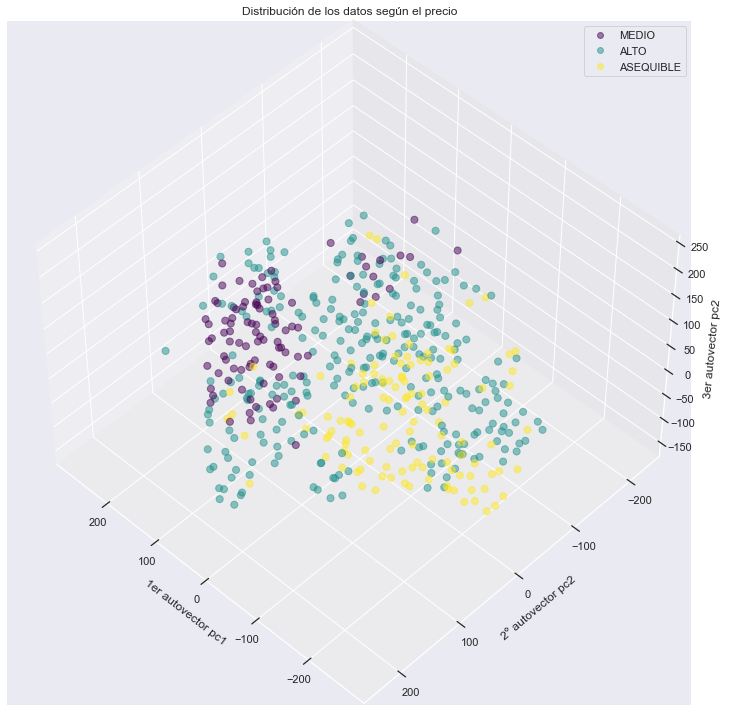

In [29]:
df_tsne["colores"] = np.where(df_tsne["Rango_precio"] == "ASEQUIBLE", 0, np.where(df_tsne["Rango_precio"] == "MEDIO", 1, 2))   
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_tsne["x"], df_tsne["y"], df_tsne["z"], marker = "o", s = 50, c = df_tsne["colores"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_tsne.Rango_precio.unique().tolist())
ax.set_title("Distribución de los datos según el precio")
ax.set_xlabel("1er autovector pc1")
ax.set_ylabel("2º autovector pc2")
ax.set_zlabel("3er autovector pc2")

In [31]:
fig = plt.figure(figsize = (15,15))
fig = px.scatter_3d(x = df_tsne["x"], y = df_tsne["y"],z = df_tsne["z"], color=df_tsne["PRECIO"])
fig.update_layout(title='Distribución de los datos', autosize=False,
#                  x_label = "1er autovector pc1",
#                  ylabel = "2º autovector pc1",
#                  zlabel = "3er autovector pc1",
                  width=800, height=800,
                  showlegend= True,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

<Figure size 1080x1080 with 0 Axes>

## Aplicad SOM para visualizar los datos.

In [32]:
net=sps.SOMNet(20, 20, df_norm.drop("Rango_precio", axis = 1).values)
net.train(start_learning_rate=0.02, epochs = 5000)

Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


In [33]:
net.nodes_graph(colnum=-1, show=True, colname = 'PRECIO')

NameError: name 'printout' is not defined

In [34]:
net.nodes_graph(colnum=-2, show=True, colname = 'LSTSAT')

NameError: name 'printout' is not defined

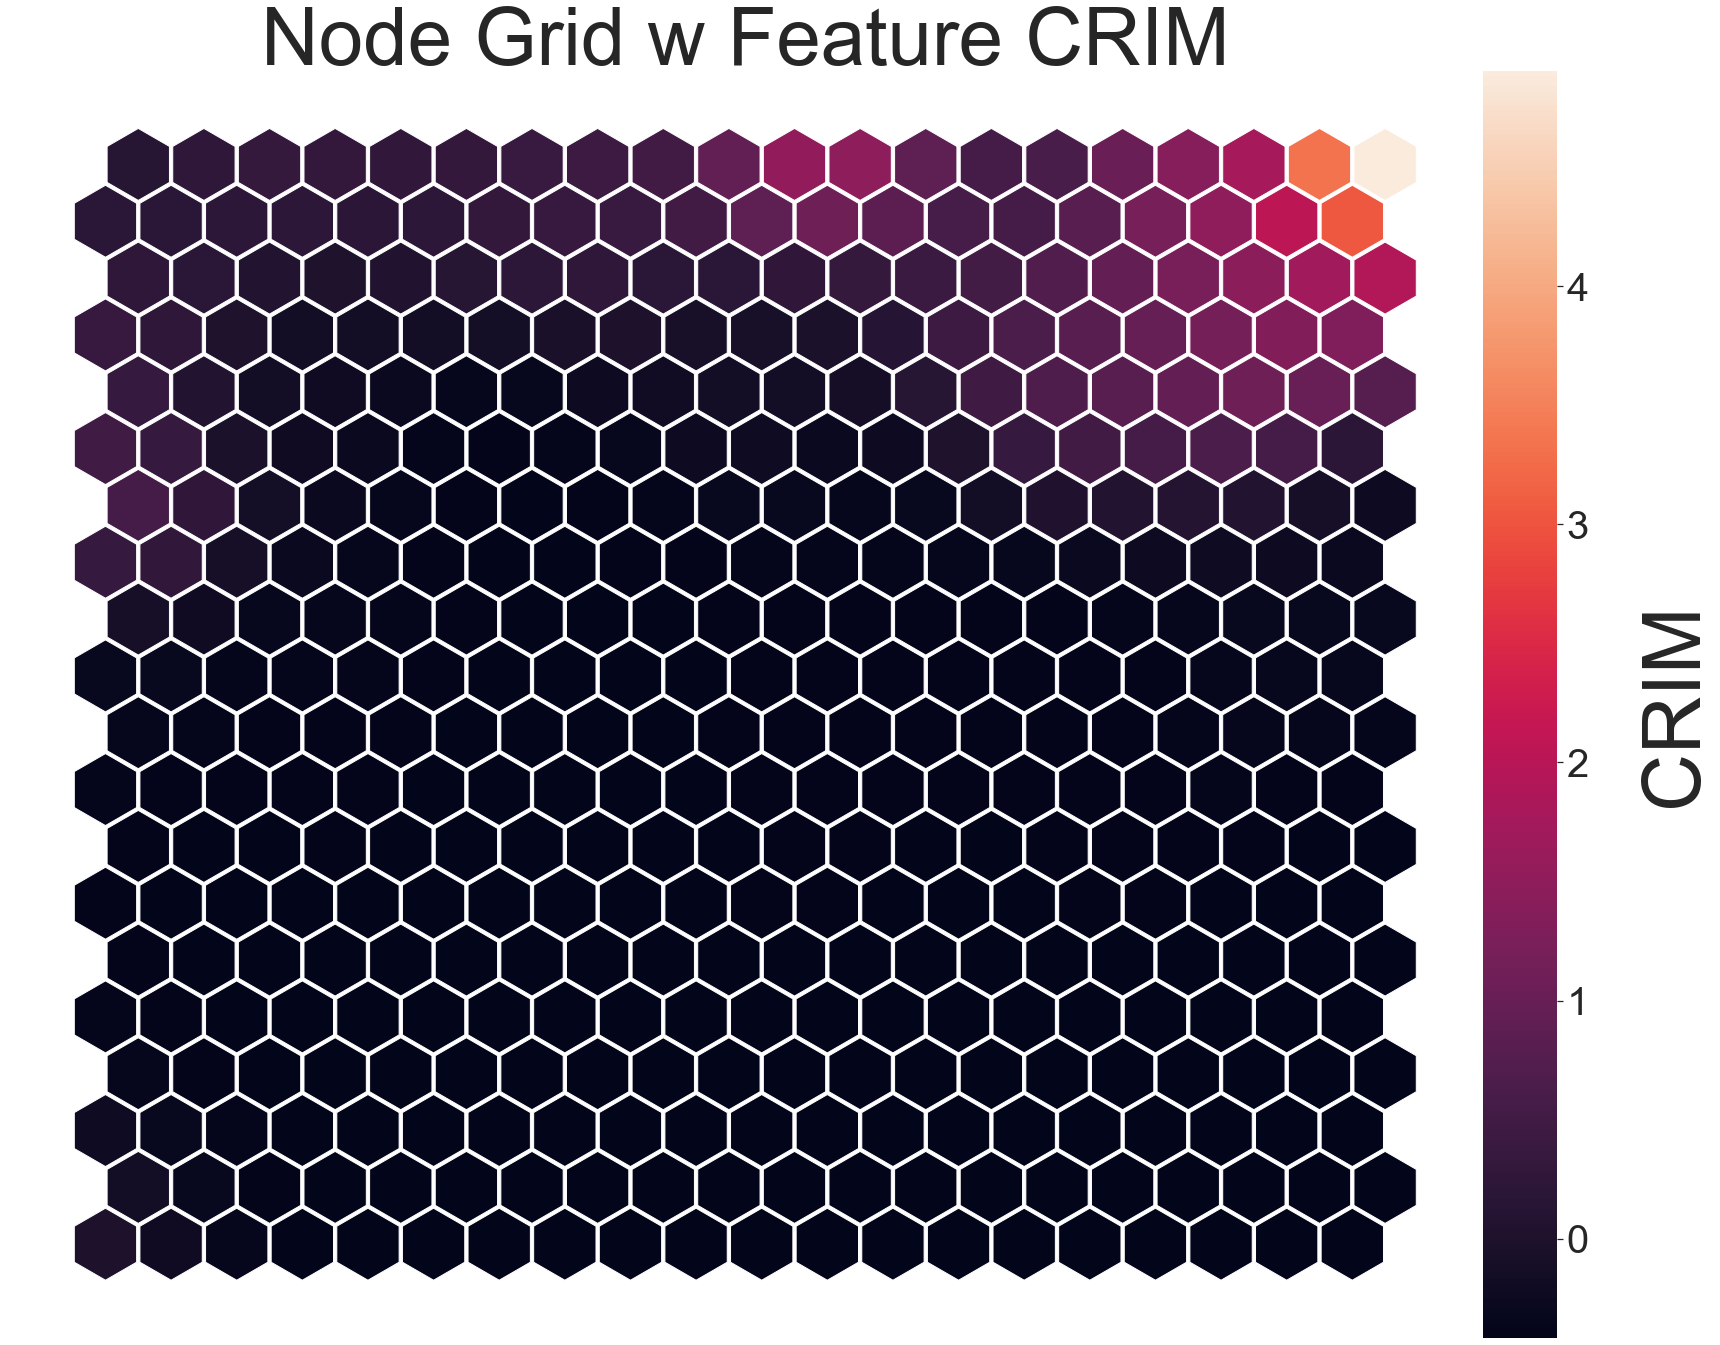

NameError: name 'printout' is not defined

In [35]:
net.nodes_graph(colnum=0, show=True, colname = 'CRIM')

## Aplicad los modelos que consideréis de clustering para generar agrupaciones de casas con características similares.

Aplicamos K-MEANS.

In [36]:
num_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_clusters] 
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

In [37]:
score = [abs(kmeans[i].fit(df_norm[boston_dataset.feature_names]).score(df_norm[boston_dataset.feature_names])) for i in range(len(kmeans))] 
score

[6578.000000000008,
 4196.159291209142,
 3514.3904144150883,
 3098.3411290592094,
 2729.9888527836374,
 2440.4712470499558,
 2216.2023824265575,
 2015.9323126986023,
 1850.2243730974153,
 1741.6396865320155,
 1633.9364712347535,
 1556.5065892464668,
 1456.1245433169765,
 1403.8462567822046,
 1350.5212911468102,
 1313.4862042238701,
 1261.8567333234148,
 1218.2228070075787,
 1171.0719916537441]

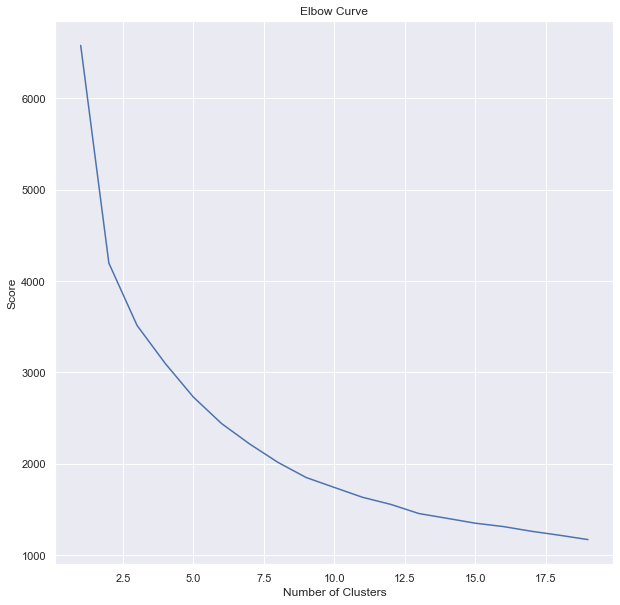

In [38]:
fig = plt.figure(figsize = (10,10))
plt.plot(num_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=8).fit(df_norm[boston_dataset.feature_names])

In [40]:
labels = kmeans.predict(df_norm[boston_dataset.feature_names])

## Representad los clusters en 3D mediante una transformación con PCA y con t-SNE.

In [41]:
df_pca["labels"] = labels
df_pca.sort_values("labels", inplace = True)

/var/folders/jm/_cqzmbbs0jv4bdms06q4tfdh0000gn/T/ipykernel_19785/176456946.py:4: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



Text(0.5, 0, '3er autovector pc2')

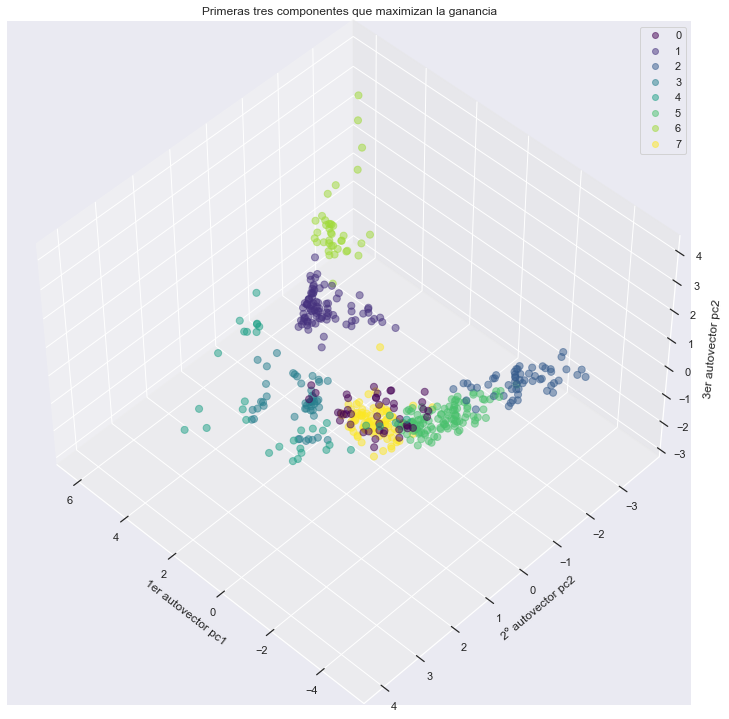

In [42]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_pca["pc1"], df_pca["pc2"], df_pca["pc3"], marker = "o", s = 50, c = df_pca["labels"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_pca.labels.unique().tolist())
ax.set_title("Primeras tres componentes que maximizan la ganancia")
ax.set_xlabel("1er autovector pc1")
ax.set_ylabel("2º autovector pc2")
ax.set_zlabel("3er autovector pc2")

In [43]:
fig = plt.figure(figsize = (15,15))
fig = px.scatter_3d(x = df_pca["pc1"],y = df_pca["pc2"], z = df_pca["pc3"], color=df_pca["labels"])
fig.update_layout(title='Primeras tres componentes que maximizan la ganancia', autosize=False,
#                  x_label = "1er autovector pc1",
#                  ylabel = "2º autovector pc1",
#                  zlabel = "3er autovector pc1",
                  width=800, height=800,
                  showlegend= True,
                  margin=dict(l=65, r=50, b=65, t=90))

<Figure size 1080x1080 with 0 Axes>

In [44]:
df_tsne["labels"] = labels
df_tsne.sort_values("labels", inplace = True)

/var/folders/jm/_cqzmbbs0jv4bdms06q4tfdh0000gn/T/ipykernel_19785/895209033.py:4: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



Text(0.5, 0, '3er autovector pc2')

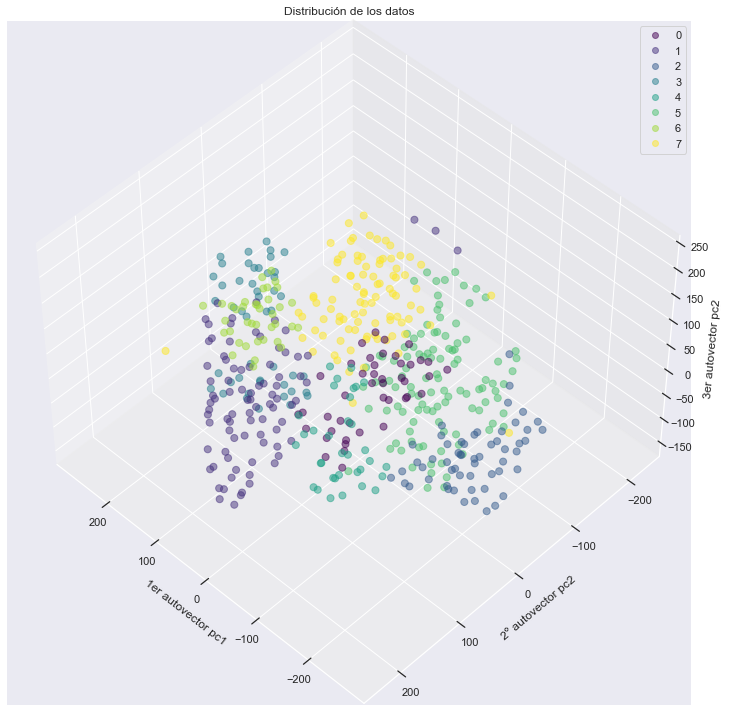

In [45]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_tsne["x"], df_tsne["y"], df_tsne["z"], marker = "o", s = 50, c = df_tsne["labels"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_tsne.labels.unique().tolist())
ax.set_title("Distribución de los datos")
ax.set_xlabel("1er autovector pc1")
ax.set_ylabel("2º autovector pc2")
ax.set_zlabel("3er autovector pc2")

In [46]:
fig = plt.figure(figsize = (15,15))
fig = px.scatter_3d(x = df_tsne["x"], y = df_tsne["y"],z = df_tsne["z"], color=df_tsne["labels"])
fig.update_layout(title='Distribución de los datos', autosize=False,
#                  x_label = "1er autovector pc1",
#                  ylabel = "2º autovector pc1",
#                  zlabel = "3er autovector pc1",
                  width=800, height=800,
                  showlegend= True,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

<Figure size 1080x1080 with 0 Axes>